# AirQualityUCI 데이터 전처리 및 시각화
이 노트북은 Air Quality UCI 데이터셋을 불러오고, 전처리 및 시각화를 수행

In [ ]:
# 1. 라이브러리 임포트
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 2. 데이터 불러오기
df = pd.read_csv("AirQualityUCI.csv", sep=';', decimal=',')

In [ ]:
# 3. 마지막 빈 열 제거 + 결측 행 제거
df = df.dropna(how='all', axis=1)
df = df.dropna()

In [ ]:
# 4. 날짜-시간 합치기
df["Time"] = df["Time"].astype(str).str.replace(".", ":", regex=False)
df["Datetime"] = pd.to_datetime(df["Date"] + " " + df["Time"], dayfirst=True, errors='coerce')
df = df.dropna(subset=["Datetime"])  # 날짜 파싱 실패한 행 제거
df = df.set_index("Datetime")
df = df.drop(columns=["Date", "Time"])

In [ ]:
# 5. 정수 변환 및 결측치(-200) 제거
df = df.apply(pd.to_numeric, errors='coerce')
df[df == -200] = pd.NA
df = df.dropna()

In [ ]:
# 6. 데이터 미리보기
df.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
Datetime,,,,,,,,,,,,,
2004-03-10 18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
2004-03-10 19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2004-03-10 20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
2004-03-10 21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
2004-03-10 22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


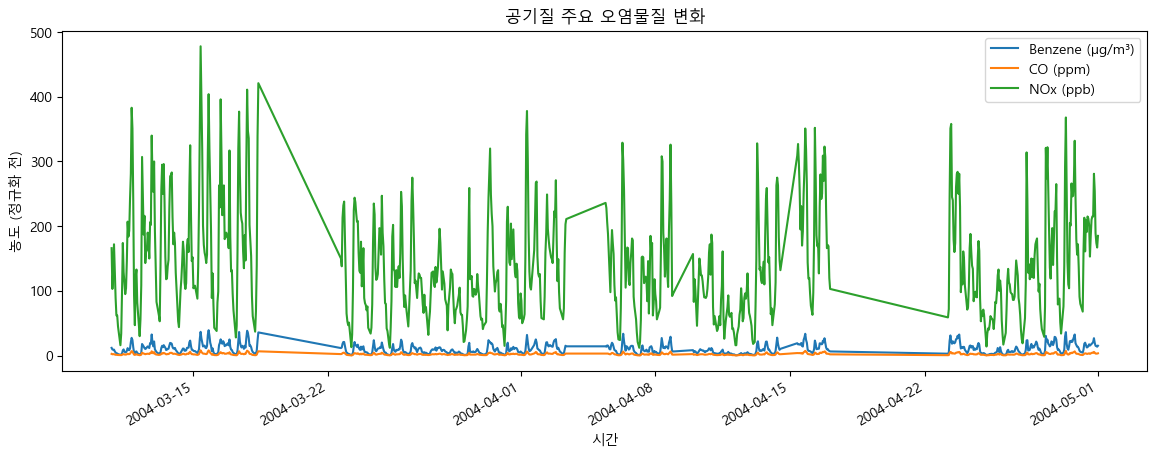

In [ ]:
plt.rcParams['font.family'] = 'Malgun Gothic'  # 윈도우 기본 한글 폰트
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 부호 깨짐 방지

# 7. 시간 흐름에 따른 주요 센서 및 실제 값 시각화
plt.figure(figsize=(14, 5))
df["C6H6(GT)"].plot(label="Benzene (µg/m³)")
df["CO(GT)"].plot(label="CO (ppm)")
df["NOx(GT)"].plot(label="NOx (ppb)")
plt.legend()
plt.title("공기질 주요 오염물질 변화")
plt.xlabel("시간")
plt.ylabel("농도 (정규화 전)")
plt.show()

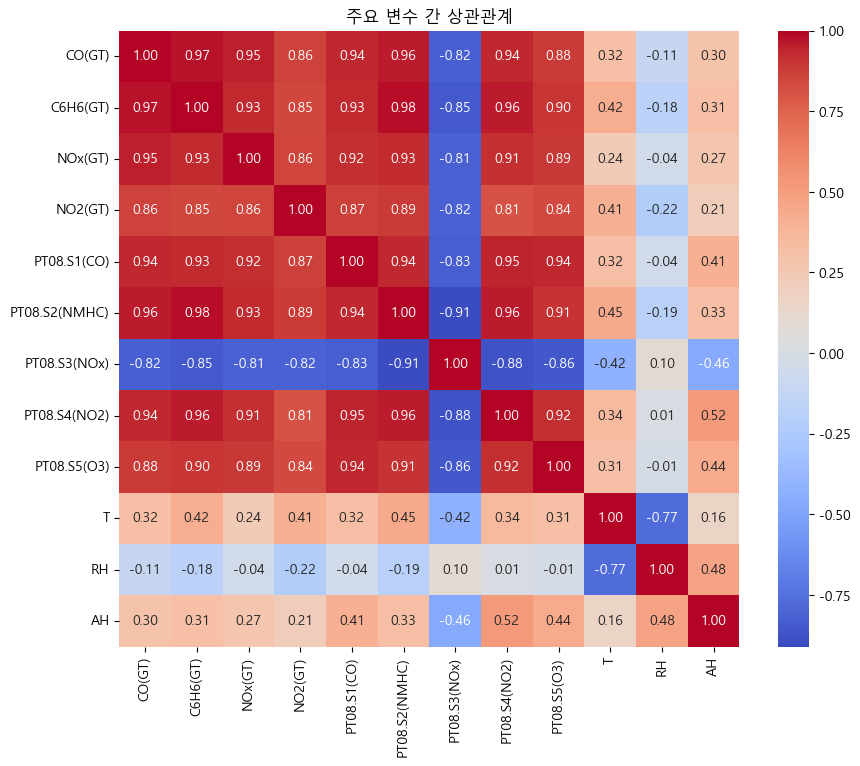

In [ ]:
# 8. 주요 변수들 간의 상관관계 행렬
features_of_interest = [
    "CO(GT)", "C6H6(GT)", "NOx(GT)", "NO2(GT)",
    "PT08.S1(CO)", "PT08.S2(NMHC)", "PT08.S3(NOx)", "PT08.S4(NO2)", "PT08.S5(O3)",
    "T", "RH", "AH"
]

corr = df[features_of_interest].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("주요 변수 간 상관관계")
plt.show()